# LDA 

This are the first steps within the project of LDA. 

In [39]:
K = 3 # Amount of topics one wants to find 

In [8]:
import nltk

nltk.download('stopwords')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from nltk.probability import FreqDist
from nltk import word_tokenize

import string
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import requests 
import html5lib
from bs4 import BeautifulSoup
import googletrans
from googletrans import Translator
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

[nltk_data] Downloading package stopwords to /Users/dj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Get the data

In [9]:
translator = Translator()
lemmatizer = WordNetLemmatizer()


def preprocess(filename):
    f = open(filename,'r')
    text = f.read()
    text = text.lower()

    text = str(translator.translate(text, dest = 'en', src = 'nl'))

    text_p = "".join([char for char in text if char not in string.punctuation])

    words = word_tokenize(text_p)
    
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    pos = pos_tag(filtered_words)
    
    return words, filtered_words, stemmed, lemmatized, pos

In [21]:
words, filtered_words, stemmed, lemmatized, pos = preprocess('/Users/dj/Documents/GitHub/inbraak_6.txt')

In [25]:
url = '/Users/dj/Documents/GitHub/inbraak_'
numbers = np.arange(1,7)
ending = '.txt'

texts = []
for i in numbers:
    p = url + str(i) + ending
    f = open(p,'r')
    text = f.read()
    texts.append(text)

In [31]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stops = stopwords.words('english') + ['said', 'mr']

count = CountVectorizer(
    stop_words=stops,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.9,
)


In [40]:
# bow = count.fit_transform(f) # Texts is a list of strings -> in our case a list of the different court sentences

bow = count.fit_transform(texts)

ldask = LatentDirichletAllocation(
    n_components=K,
    max_iter=100, 
    random_state=42)
ldask.fit(bow)

LatentDirichletAllocation(max_iter=100, n_components=3, random_state=42)

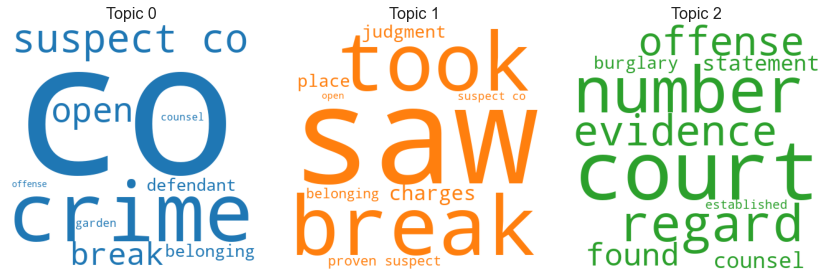

In [42]:
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

nb_columns = 3
nb_rows = math.ceil(K / nb_columns)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols * math.ceil(K / len(cols))

cloud = WordCloud(background_color='white',
                  width=400,
                  height=400,
                  max_words=10,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# This is different than with GENSIM
topics = ldask.components_
feature_names = count.get_feature_names()
n_top_words = 10
# End Difference

fig, axes = plt.subplots(ncols=nb_columns, nrows=nb_rows, 
                         figsize=(4*nb_columns, 4*nb_rows), 
                         sharex=True, sharey=True)

for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    # This is different than with GENSIM
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    topic_words = {feature_names[i]: topic[i] for i in top_features_ind}
    # End Difference

    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.imshow(cloud)
    ax.set_title(f'Topic {i}', fontdict=dict(size=16))
    ax.axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [43]:
from textwrap import fill

topics_in_doc = ldask.transform(bow[:1])

print(f'Document:\n{fill(texts[0])} \n')
print(f'Topics:')
for i, w in enumerate(topics_in_doc[0]):
    print(f'Topic #{i:>2d} : {w:.2f}')

Document:
Translated(src=nl, dest=en, text=ass="linebreak1">the public
prosecutor at the East Netherlands district prosecutor's office
against           [suspect]         born on [date of birth] 1995 in
[place of birth] currently detained in [detention address] counsel:
mr. T. Kocabas, lawyer in Zoetermeer. indictment The suspect has been
charged with: 1. Primarily he on or about August 23, 2017 in Zwolle,
at least in the Netherlands, together and in association with another
or others, at least alone, to carry out the crime intended by the
suspect to commit the crime with the intent of misappropriation
in/from a home located at [address 1], goods and/or money to be taken
away, belonging wholly or partly to [victim 1], in any case to someone
else or others than the suspect and /or his co-perpetrators, thereby
gaining access to the scene of the crime and/or bringing the
goods/money to be removed within his/her/their reach by means of
forcible entry, breaking, climbing, as follows: hey co